### Importing libraries

In [344]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset using pandas & Giving the column names

In [345]:
#Reading the Data using pandas dataframe
spam_email_data = pd.read_csv("spambase.data")
#Giving the column names
spam_email_data.columns = ['word_freq_make','word_freq_address','word_freq_all', 'word_freq_3d','word_freq_our','word_freq_over','word_freq_remove', 'word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest','capital_run_length_total','spam_or_not_spam']

# Exploratory Data Analysis

In [346]:
#Reading the first 5 tuples of the dataset
spam_email_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_or_not_spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [347]:
#describing the data set
spam_email_data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_or_not_spam
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,...,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,...,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.314250,0.052000,0.000000,3.705250,43.000000,265.250000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [348]:
#check number of rows and columns in dataset
spam_email_data.shape

(4600, 58)

### Dropping duplicates if any are present

In [349]:
#checking for duplicates and dropping them
spam_email_data = spam_email_data.drop_duplicates()
display(spam_email_data)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_or_not_spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


#### Checking for null values and removing them

In [350]:
#Checking for null values
null_values = spam_email_data.isnull().sum()
null_values

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [351]:
#removing process
spam_email_data.dropna(inplace=True)

## Checking the class distribution and visualization

In [352]:
class_distribution = spam_email_data['spam_or_not_spam'].value_counts()
class_distribution

0    2531
1    1678
Name: spam_or_not_spam, dtype: int64

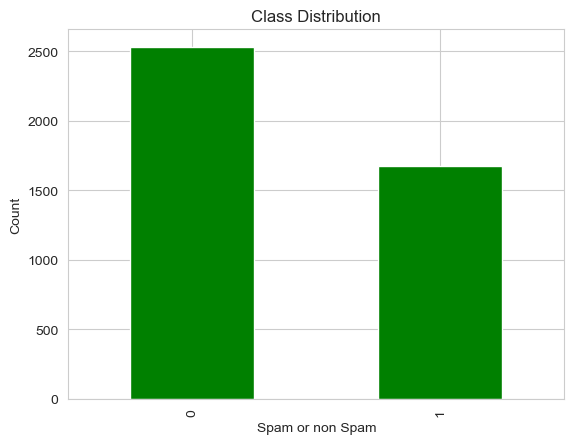

In [353]:
class_distribution.plot(kind='bar',color = 'green')
plt.title('Class Distribution')
plt.xlabel('Spam or non Spam')
plt.ylabel('Count')
plt.show()

#### Correlation Analysis

In [354]:
# Check the correlation matrix
correlation_matrix = spam_email_data.corr()
print(correlation_matrix)

                            word_freq_make  word_freq_address  word_freq_all  \
word_freq_make                    1.000000           0.034114       0.063267   
word_freq_address                 0.034114           1.000000       0.027609   
word_freq_all                     0.063267           0.027609       1.000000   
word_freq_3d                      0.005384          -0.008936      -0.019895   
word_freq_our                     0.021740           0.036983       0.065681   
word_freq_over                    0.055040           0.005623       0.066608   
word_freq_remove                  0.011037           0.077468       0.028630   
word_freq_internet               -0.004392           0.013781       0.007263   
word_freq_order                   0.103818           0.053525       0.077618   
word_freq_mail                    0.040799           0.184441       0.025201   
word_freq_receive                 0.063007           0.060819       0.055700   
word_freq_will                    0.0759

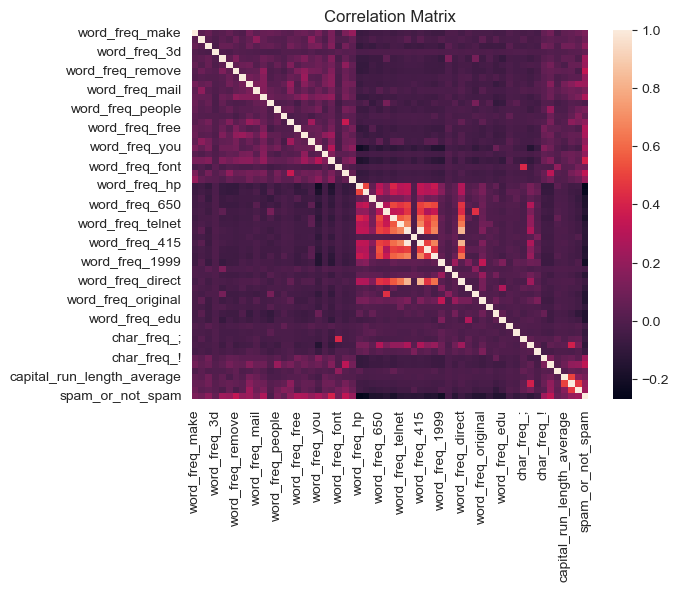

In [355]:
#Visualizing the correlation matrix
sns.heatmap(correlation_matrix)
plt.title('Correlation Matrix')
plt.show()

## Create a dataframe with all training data except the target column

In [356]:
#Dropping the target column
X = spam_email_data.drop(columns=["spam_or_not_spam"])
display(X)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [357]:
#separate target values column
y = spam_email_data['spam_or_not_spam'].values

#view target values
y[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

## KNN Model - Without PCA

In [358]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [359]:
# Fitting classifier to the Training set
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [360]:
# Predicting the Test set results
y_test_pred_1 = knn.predict(X_test)
y_test_pred_1

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,

In [361]:
y_train_pred_1 = knn.predict(X_train)
y_train_pred_1

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [362]:
#printing the precision, f1 score, recall for the test dataset
print(classification_report(y_test,y_test_pred_1))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       483
           1       0.75      0.69      0.72       359

    accuracy                           0.77       842
   macro avg       0.77      0.76      0.77       842
weighted avg       0.77      0.77      0.77       842



In [363]:
#printing the precision, f1 score, recall for the train dataset
print(classification_report(y_train,y_train_pred_1))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      2048
           1       0.84      0.80      0.82      1319

    accuracy                           0.86      3367
   macro avg       0.86      0.85      0.85      3367
weighted avg       0.86      0.86      0.86      3367



Scaling the dataset using StandardScaler(transforming the data on to a unit scale mean = 0, variance = 1 for better performance.)

In [364]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.35203068,  0.3687239 ,  0.40452578, ..., -0.00815397,
         0.24482253,  1.19099523],
       [-0.14796835, -0.24776187,  0.81174673, ...,  0.13384834,
         2.16884257,  3.18079631],
       [-0.34796797, -0.24776187, -0.56504793, ..., -0.05572942,
        -0.06081607, -0.16194019],
       ...,
       [ 0.6520301 , -0.24776187,  0.01669629, ..., -0.12007846,
        -0.23117201, -0.27993815],
       [ 2.85202586, -0.24776187, -0.56504793, ..., -0.12783172,
        -0.23618248, -0.34459456],
       [-0.34796797, -0.24776187,  0.69539789, ..., -0.12472438,
        -0.23618248, -0.40601815]])

## K-NN Model - With Scaled Data

In [365]:
# Splitting the dataset into the Training set and Test set
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [366]:
# Fitting classifier to the Training set
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled,y_train_scaled)

KNeighborsClassifier()

In [367]:
# Predicting the Test set results
y_test_pred_scaled = knn.predict(X_test_scaled)
y_test_pred_scaled

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,

In [368]:
y_train_pred_scaled = knn.predict(X_train_scaled)
y_train_pred_scaled

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [369]:
#printing the precision, f1 score, recall for the test dataset
print(classification_report(y_test_scaled,y_test_pred_scaled))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       483
           1       0.92      0.85      0.88       359

    accuracy                           0.90       842
   macro avg       0.91      0.90      0.90       842
weighted avg       0.90      0.90      0.90       842



In [370]:
#printing the precision, f1 score, recall for the train dataset
print(classification_report(y_train_scaled,y_train_pred_scaled))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2048
           1       0.92      0.89      0.91      1319

    accuracy                           0.93      3367
   macro avg       0.93      0.92      0.92      3367
weighted avg       0.93      0.93      0.93      3367



## Applying PCA such that 80% of the data is retained

In [371]:
pca = PCA(0.80)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape
# pca = decomposition.PCA()
# spam_pca = pca.fit_transform(X)
# pca.explained_variance_ratio_
# pca.explained_variance_ratio_.sum()

(4209, 36)

In [372]:
pca.explained_variance_ratio_

array([0.10899513, 0.05583094, 0.0353128 , 0.02858045, 0.0271153 ,
       0.02575975, 0.02483614, 0.02398193, 0.02270325, 0.02183887,
       0.02167963, 0.02015995, 0.02006717, 0.01935537, 0.01924267,
       0.01866808, 0.01848522, 0.01796674, 0.0178274 , 0.01756145,
       0.01717349, 0.01698023, 0.01672036, 0.01657472, 0.01645046,
       0.01610422, 0.01585499, 0.01571016, 0.0153264 , 0.01517569,
       0.01456768, 0.01435856, 0.01421106, 0.01406908, 0.01383434,
       0.01333399])

In [373]:
pca.explained_variance_ratio_.sum()

0.8124136293983034

## Splitting the data to training and testing (Test size is 20% and Train size is 80%)

In [374]:
# Splitting the dataset into the Training set and Test set
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

## K-NN Model - With PCA and Scaling

In [375]:
# Fitting classifier to the Training set
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_pca,y_train_pca)

KNeighborsClassifier()

In [376]:
# Predicting the Test set results
y_test_pred = knn.predict(X_test_pca)
y_test_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [377]:
#Predicting the Train set results
y_train_pred = knn.predict(X_train_pca)
y_train_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [378]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test_pca, y_test_pred)
cm

array([[451,  32],
       [ 51, 308]], dtype=int64)

In [379]:
#printing the precision, f1 score, recall for the test dataset
print(classification_report(y_test_pca,y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       483
           1       0.91      0.86      0.88       359

    accuracy                           0.90       842
   macro avg       0.90      0.90      0.90       842
weighted avg       0.90      0.90      0.90       842



In [380]:
#printing the precision, f1 score, recall for the train dataset
print(classification_report(y_train_pca,y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2048
           1       0.92      0.90      0.91      1319

    accuracy                           0.93      3367
   macro avg       0.93      0.93      0.93      3367
weighted avg       0.93      0.93      0.93      3367



Decision Tree Model

In [381]:
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [382]:
clf = clf.fit(X_train_pca,y_train_pca)

In [383]:
predTree = clf.predict(X_test_pca)
predTree

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,

In [384]:
# Making the Confusion Matrix
cmTree = confusion_matrix(y_test_pca, y_test_pred)
cmTree

array([[451,  32],
       [ 51, 308]], dtype=int64)

In [385]:
print(classification_report(y_test_pca,y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       483
           1       0.91      0.86      0.88       359

    accuracy                           0.90       842
   macro avg       0.90      0.90      0.90       842
weighted avg       0.90      0.90      0.90       842



In [386]:
print(classification_report(y_train_pca,y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2048
           1       0.92      0.90      0.91      1319

    accuracy                           0.93      3367
   macro avg       0.93      0.93      0.93      3367
weighted avg       0.93      0.93      0.93      3367



In [387]:
print(classification_report(y_test_pca,y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       483
           1       0.91      0.86      0.88       359

    accuracy                           0.90       842
   macro avg       0.90      0.90      0.90       842
weighted avg       0.90      0.90      0.90       842



Visualizing the final decision tree

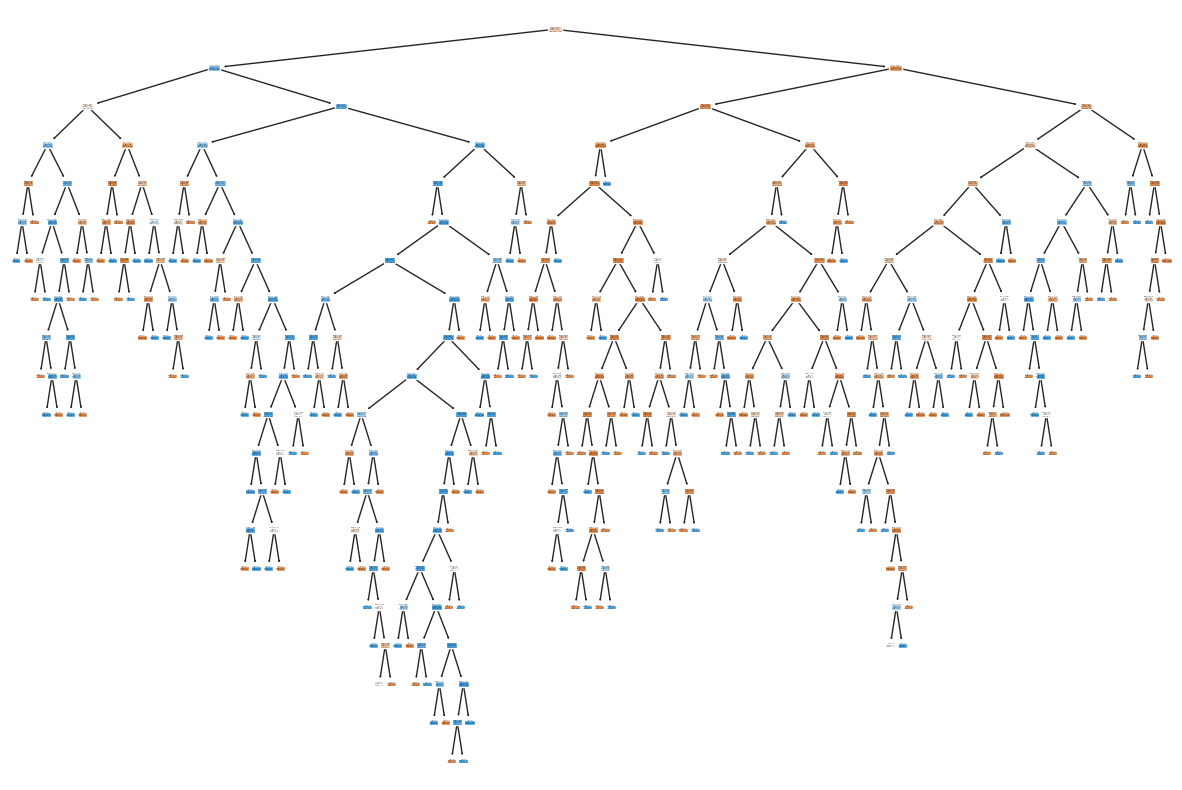

In [388]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()